
# PID Controller

A proportional–integral–derivative controller (PID controller or three-term controller) is a control loop mechanism employing feedback

In [1]:
class PIDController:
    def __init__(self, kp, ki, kd ):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.target = 0;
        self.current = 0;
        self.signal = 0;
        self.prev_error = 0
        self.integral = 0
        
    def setTarget(self, target, current):
        self.target = target
        self.current = current
        self.signal = 0;
        self.prev_error = 0
        self.integral = 0

    def compute(self, setpoint, current_value):
        error = setpoint - current_value
        self.integral += error # the deviation from the target.
        derivative = error - self.prev_error # the change in the deviation from the target
        
        _p = self.kp * error
        _i = self.ki * self.integral
        _d = self.kd * derivative
        
        output = self.kp * error + self.ki * self.integral + self.kd * derivative
        self.prev_error = error
        return output, _p , _i , _d;
    
    def process(self):
        self.signal, p, i, d = self.compute(self.target, self.current)
        self.current += self.signal
        return self.current, self.signal, p , i , d

In [34]:
kp = 0.9   # Proportional gain
ki = 0.2   # Integral gain
kd = 0.1   # Derivative gain
target = 30;
current = 20;

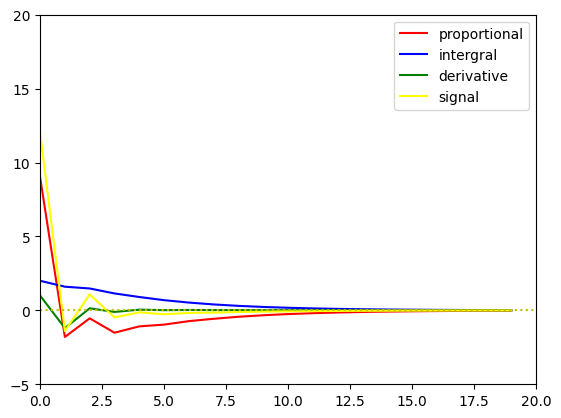

In [35]:
%matplotlib inline
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

if __name__ == "__main__":

    # create empty lists for the x and y data
    x = [ ];
    p = [];
    i_ = [];
    d = [];
    out = [];
    fig = plt.figure()
    ax = plt.axes( xlim=(0,20),ylim=(-5,20) );
    lineP = plt.plot([], [],color="red",label="proportional")[0];
    lineI = plt.plot([], [],color="blue",label="intergral")[0];
    lineD = plt.plot([], [],color="green",label="derivative")[0];
    lineOut = plt.plot([], [],color="yellow",label="signal")[0];
    plt.axhline(y = 0, color = 'y', linestyle = 'dotted')
    leg = plt.legend(loc="upper right")
    
    def process(i):
        if i == 0:
            if hasattr( process, "pid_controller"):
                return;
            process.pid_controller = PIDController(kp, ki, kd);
            process.pid_controller.setTarget( target, current );
        val, sig, _p , _i , _d = process.pid_controller.process()
        
        x.append(i)
        p.append( _p )
        i_.append( _i )
        d.append( _d )
        out.append( sig )
        
        lineP.set_data( x,p)
        lineI.set_data( x,i_)
        lineD.set_data( x,d)
        lineOut.set_data( x,out)
    
        return lineP, lineI, lineD, lineOut
    
    
    anim = FuncAnimation(fig, process, frames=20, interval=1, blit=False, repeat=False)
    HTML(anim.to_html5_video())


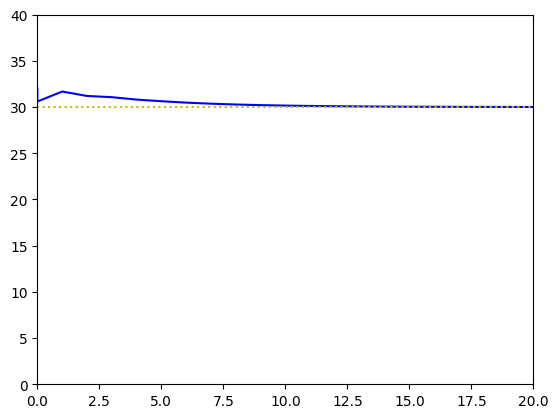

In [36]:
%matplotlib inline
import random
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
    
pid_controller = PIDController(kp, ki, kd );
pid_controller.setTarget( target, current );
# create empty lists for the x and y data
x = [ ];
ctrlSig = [];
temp = [];
fig = plt.figure()
ax = plt.axes( xlim=(0,20),ylim=(0,40) );
lineCtrl = plt.plot([], [],color="red")[0];
lineTemp = plt.plot([], [],color="blue")[0];

plt.axhline(y = 30, color = 'y', linestyle = 'dotted')

lastI = 0;
# function that draws each frame of the animation
def animate(i):
    global lastI
    if i < lastI:
        return;
    lastI = i
    _temp = pid_controller.process()[0];
        
    temp.append( _temp )
    x.append(i)
    
    lineTemp.set_data( x,temp)
    
    return lineTemp
    
anim = FuncAnimation(fig, animate, frames=25, interval=100, repeat=False)
HTML(anim.to_html5_video())


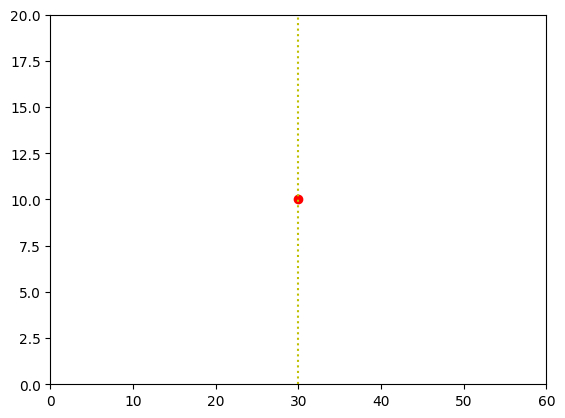

In [37]:
#points, = ax.plot([1,2], [3,4], marker='o', ls="" )  # for points

%matplotlib inline
import random
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
    
pid_controller = PIDController(kp, ki, kd );
pid_controller.setTarget( target, current );
# create empty lists for the x and y data
x = [ ];
ctrlSig = [];
temp = [];
fig = plt.figure()
ax = plt.axes( xlim=(0,60),ylim=(0,20) );
lineTemp = plt.plot([], [],marker="o",ls="", color="red")[0];

plt.axvline(x = 30, color = 'y', linestyle = 'dotted')

lastI = 0;
# function that draws each frame of the animation
def animate(i):
    global lastI
    if i < lastI:
        return;
    lastI = i
    _temp = pid_controller.process()[0];
    
    lineTemp.set_data( [ _temp ] , [ 10 ] )
    
    
    return lineTemp
    
anim = FuncAnimation(fig, animate, frames=25, interval=200, repeat=False)
HTML(anim.to_html5_video())
